In [ ]:
mammoth_org = pd.read_csv('drive/MyDrive/kill/mammoth_a.csv')

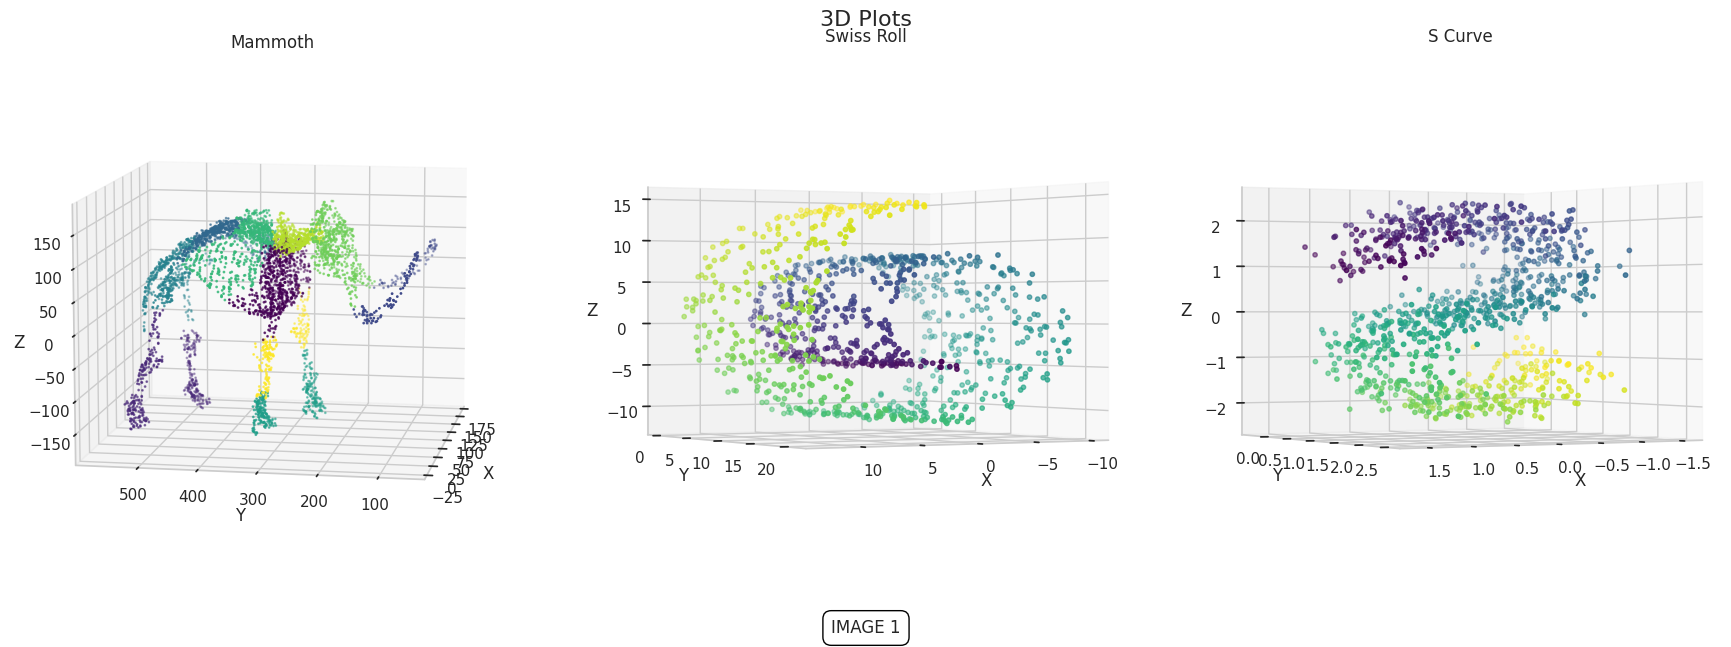

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_swiss_roll, make_s_curve
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

# Set seaborn style
sns.set(style="whitegrid")

# Load sample datasets for plotting (Swiss Roll and S Curve)
X_swiss, color_swiss = make_swiss_roll(n_samples=1000, noise=0.2)
X_scurve, color_scurve = make_s_curve(n_samples=1000, noise=0.2)

datasets = {
    "Swiss Roll": (X_swiss, color_swiss),
    "S Curve": (X_scurve, color_scurve)
}

# Prepare data for the clustering plot
SAMPLE_SIZE = 5000
mammoth = mammoth_org.sample(SAMPLE_SIZE)




# Generate the color scale
col_len = 10

# Perform clustering
clustering = AgglomerativeClustering(n_clusters=col_len).fit(mammoth)
AC = AgglomerativeClustering(n_clusters=col_len, linkage='ward')
AC.fit(mammoth)
labels = AC.labels_

# Train KNeighborsClassifier
KN = KNeighborsClassifier(n_neighbors=col_len)
KN.fit(mammoth, labels)
labels2 = KN.predict(mammoth)

# Define a color map for the clustering plot
cmap = mpl.colors.ListedColormap(list(color_scale))

# Create a figure with subplots
fig = plt.figure(figsize=(18, 6))
fig.suptitle('3D Plots', fontsize=16)

ax = fig.add_subplot(1, 3, 1, projection='3d')

scatter = ax.scatter(mammoth['x'], mammoth['y'], mammoth['z'], s=1, c=labels2, cmap='viridis')
ax.set_title('Mammoth')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(10, -170)

# Plot for Swiss Roll and S Curve datasets
for idx, (dataset_name, (X, y)) in enumerate(datasets.items()):
    ax = fig.add_subplot(1, 3, idx + 2, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', s=10)
    ax.set_title(dataset_name, pad=10)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(elev=0., azim=60)

# # Plot for the mammoth clustering visualization
# ax = fig.add_subplot(1, 3, 3, projection='3d')

# scatter = ax.scatter(mammoth['x'], mammoth['y'], mammoth['z'], s=1, c=labels2, cmap='viridis')
# ax.set_title('3D Clustering Visualization')
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# ax.view_init(10, -170)

# Add lower text to the whole figure
fig.text(0.5, -0.05, 'IMAGE 1', ha='center', va='center', fontsize=12, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'))

plt.tight_layout()

# Save and display the figure
plt.savefig('3d_combined_plots.png', dpi=300, bbox_inches='tight')
plt.show()

dataset_name: Mammoth. tech_name: MDS


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Procees time : 14.301830049355825
dataset_name: Mammoth. tech_name: PCA
Procees time : 7.272561391194662e-05
dataset_name: Mammoth. tech_name: t-SNE
Procees time : 0.8122338771820068
dataset_name: Mammoth. tech_name: UMAP


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Procees time : 0.6214965264002482
dataset_name: Swiss_roll. tech_name: MDS


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Procees time : 0.4142596522967021
dataset_name: Swiss_roll. tech_name: PCA
Procees time : 4.338423411051432e-05
dataset_name: Swiss_roll. tech_name: t-SNE
Procees time : 0.1323225458463033
dataset_name: Swiss_roll. tech_name: UMAP
Procees time : 0.05045249859491984
dataset_name: Digits. tech_name: MDS


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Procees time : 1.910416348775228
dataset_name: Digits. tech_name: PCA
Procees time : 0.0017255465189615884
dataset_name: Digits. tech_name: t-SNE
Procees time : 0.2572423338890076
dataset_name: Digits. tech_name: UMAP
Procees time : 0.13055087725321451
dataset_name: S_curve. tech_name: MDS


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Procees time : 0.2834336837132772
dataset_name: S_curve. tech_name: PCA
Procees time : 4.8780441284179686e-05
dataset_name: S_curve. tech_name: t-SNE
Procees time : 0.16699331204096476
dataset_name: S_curve. tech_name: UMAP
Procees time : 0.05802526076634725


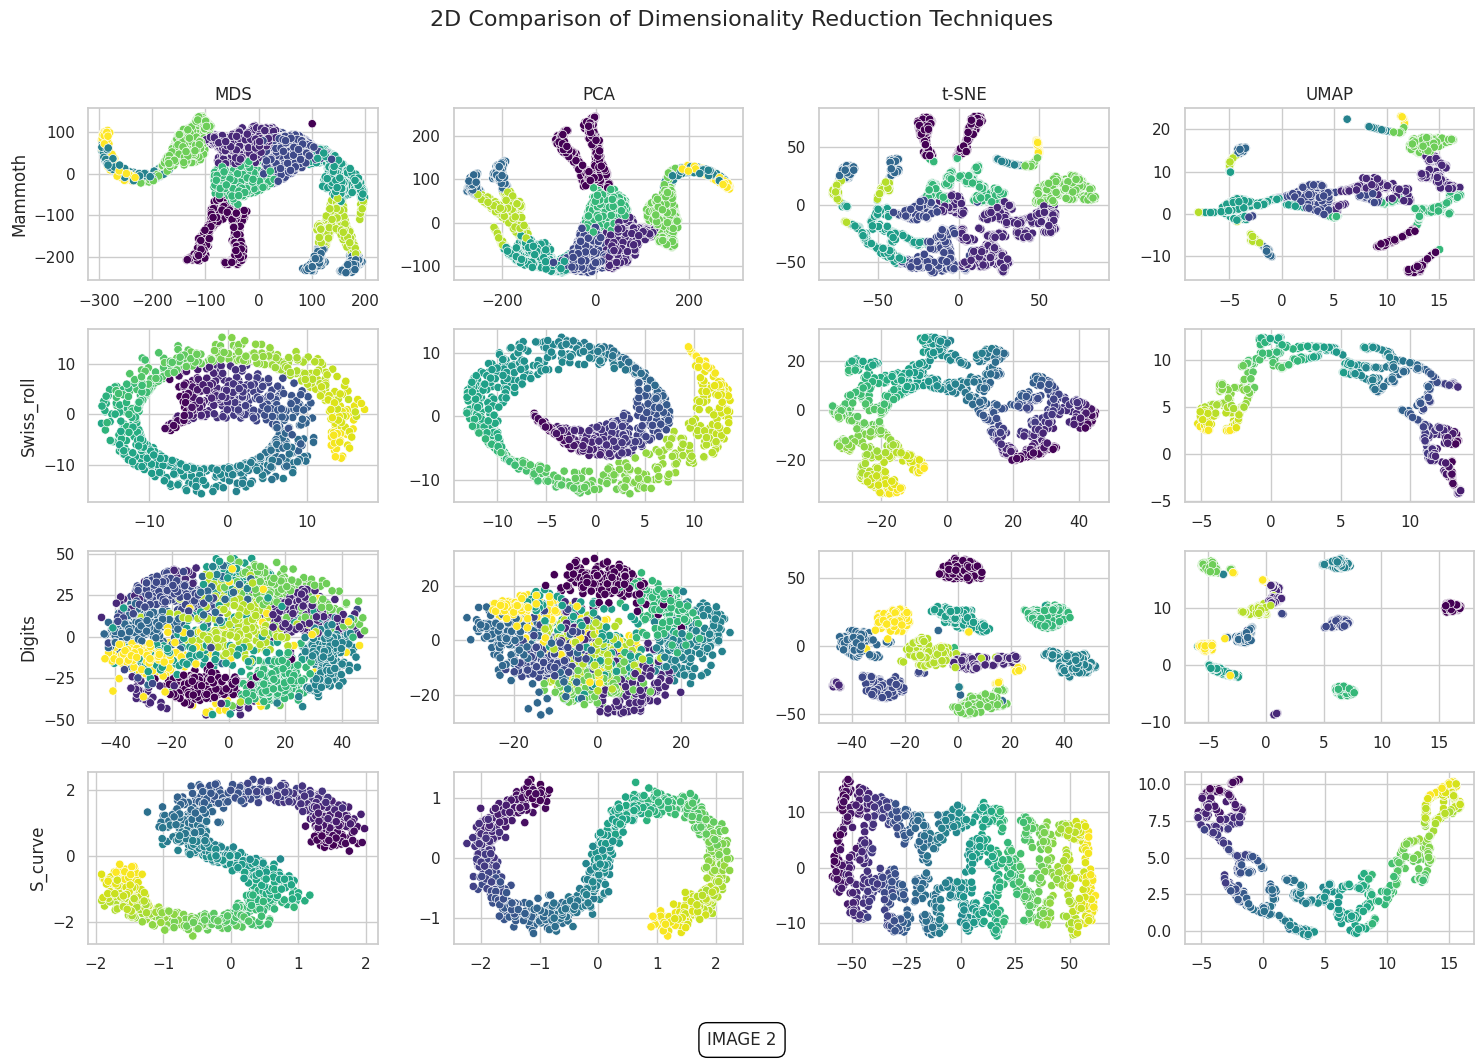

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, load_digits, load_wine
from sklearn.datasets import load_digits, make_swiss_roll, make_s_curve
from time import time
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
import umap

# Load datasets
iris = load_iris()
digits = load_digits()
wine = load_wine()
X_swiss, color_swiss = make_swiss_roll(n_samples=1000, noise=0.1, random_state=42)
X_scurve, color_scurve = make_s_curve(n_samples=1000, noise=0.1, random_state=42)
X_mammoth = mammoth.to_numpy()

datasets = {
    "Mammoth": (X_mammoth, labels2) ,
    "Swiss_roll": (X_swiss, color_swiss),
    "Digits": (digits.data, digits.target),
    "S_curve": (X_scurve, color_scurve )
}

# Dimensionality reduction techniques
techniques = {
    "MDS": MDS(n_components=2, random_state=42),
    "PCA": PCA(n_components=2),
    "t-SNE": TSNE(n_components=2, random_state=42),
    "UMAP": umap.UMAP(n_components=2, random_state=42)
}

# Plotting
fig, axes = plt.subplots(len(datasets), len(techniques), figsize=(15, 10))
fig.suptitle('2D Comparison of Dimensionality Reduction Techniques', fontsize=16)

for row_idx, (dataset_name, (X, y)) in enumerate(datasets.items()):
    for col_idx, (tech_name, tech) in enumerate(techniques.items()):
        print(f'dataset_name: {dataset_name}. tech_name: {tech_name}')
        tic = time()
        X_reduced = tech.fit_transform(X)
        toc = time()
        print(f'Procees time : {(toc-tic)/60}')
        ax = axes[row_idx, col_idx]
        # if dataset_name == 'Mammoth':
        #   palette_color = mycolors
        # else:
        palette_color = 'viridis'
        sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y, palette=palette_color, ax=ax, legend=None)

        if row_idx == 0:
            ax.set_title(tech_name)
        if col_idx == 0:
            ax.set_ylabel(dataset_name)
        else:
            ax.set_ylabel('')

# Add lower text to the whole image
fig.text(0.5, -0.05, 'IMAGE 2',
         ha='center', va='center', fontsize=12, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'))


plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save the plot as an image
# plt.tight_layout()
plt.savefig('2d_plots.png', dpi=300, bbox_inches='tight')

plt.show()
